# Survey EDA, Cleaning & Pre-Modeling
This notebook has cleaning and EDA for the survey data (adult19.csv) then saves the clean, parsed dataset as adult19_clean.csv. It also has some pre-modeling of non-parsed data using SelectKbest.

### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

In [2]:
# read in data
df = pd.read_csv('./adult19.csv')
df.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,HHX,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,NaN,NaN,1,1,1,10,13177.008,7601.336,H048109,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,NaN,NaN,1,1,1,10,6140.552,3344.434,H027044,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,NaN,NaN,1,1,1,10,9191.061,6949.498,H058855,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,NaN,NaN,1,1,1,10,7900.035,6446.327,H031993,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,NaN,NaN,1,1,1,10,10875.772,8646.586,H007122,1.13


In [3]:
df.shape

(31997, 534)

### EDA & Cleaning

In [4]:
# checking value count of coronary heart disease to decide on target feature
df['CHDEV_A'].value_counts(normalize=False)
# 1=yes, 2=no, 7=refused, 9=don't know

2    30048
1     1846
9       67
7       35
8        1
Name: CHDEV_A, dtype: int64

In [191]:
# hypertension value counts
df['HYPEV_A'].value_counts(normalize=True) # hypertension

2    0.640714
1    0.358377
9    0.000658
7    0.000251
Name: HYPEV_A, dtype: float64

In [6]:
# prostate cancer value types
df['PROSTCAN_A'].value_counts(normalize=False) # prostate cancer

2.0    1123
1.0     462
9.0      11
7.0       2
Name: PROSTCAN_A, dtype: int64

In [193]:
# diabetes value counts
df['DIBEV_A'].value_counts(normalize=True) #diabetes

2    0.895049
1    0.104481
9    0.000345
7    0.000125
Name: DIBEV_A, dtype: float64

In [180]:
# high cholesterol 
df['CHLEV_A'].value_counts(normalize=True)

2    0.710922
1    0.286413
9    0.002509
7    0.000157
Name: CHLEV_A, dtype: float64

In [187]:
# smoker
df['SMKCIGST_A'].value_counts(normalize=True)

4    0.592111
3    0.249130
1    0.105328
2    0.029036
9    0.024176
5    0.000219
Name: SMKCIGST_A, dtype: float64

In [4]:
# finding columns with more than half of values missing
most_nulls = [column for column in df.columns if df[column].isnull().sum() > 16_000]

In [9]:
# number of columns with mostly null values
len(most_nulls)

291

In [10]:
# checking if specific columns in list of null columns
if 'CHDEV_A' in most_nulls:
    print('yes')
else:
    print('no')

no


In [5]:
# dropping mostly null columns
df.drop(columns=most_nulls, inplace=True)

In [6]:
# now has 243 columns
df.shape

(31997, 243)

In [13]:
# no duplicates in dataset
df[df.duplicated() == True]

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,HYPEV_A,PHSTAT_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,HHX,POVRATTC_A


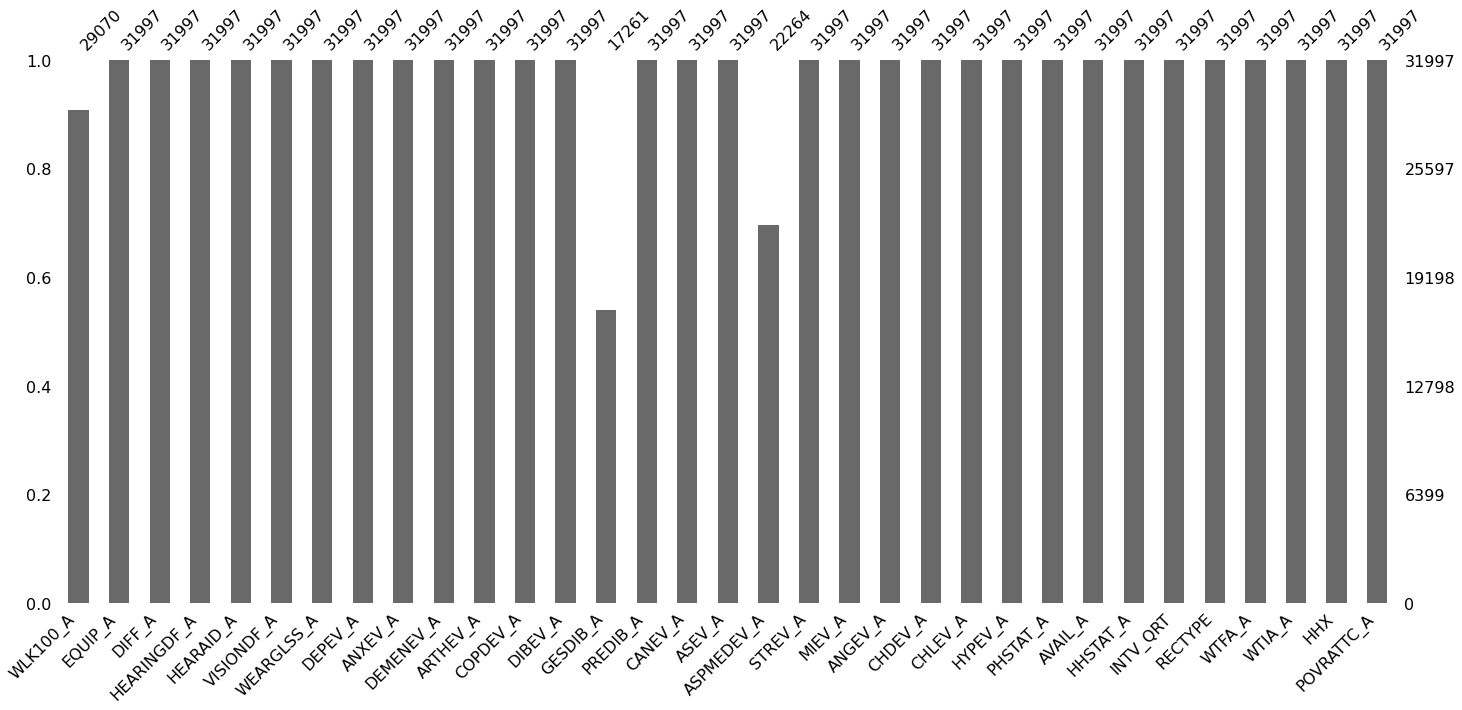

In [25]:
# visually checking which columns have nulls
msno.bar(df[df.columns[210:]]);

In [29]:
# checking if nulls are missing in the same rows, but they are not always
df.groupby('PAITOOTH3M_A')['PRVSCOV1_A'].value_counts(dropna=False)

PAITOOTH3M_A  PRVSCOV1_A
1.0           NaN           5946
              2.0           5733
              1.0           4068
              9.0            323
              8.0            264
              7.0              4
2.0           NaN            776
              2.0            578
              1.0            323
              9.0             41
              8.0             34
3.0           NaN            383
              2.0            146
              1.0            121
              9.0             19
              8.0              8
4.0           NaN            209
              2.0            132
              1.0             77
              8.0              8
              9.0              4
7.0           2.0              3
              NaN              1
              1.0              1
              8.0              1
8.0           NaN             23
              2.0             13
              1.0             12
              9.0              1
9.0           NaN 

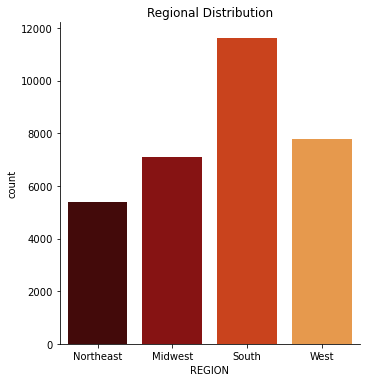

In [71]:
sns.catplot(x='REGION', kind='count', palette='gist_heat', data=df); # gist_heat, ch:.25, magma
plt.title('Regional Distribution');
plt.xticks(ticks=(0,1,2,3), labels=('Northeast', 'Midwest', 'South', 'West'));

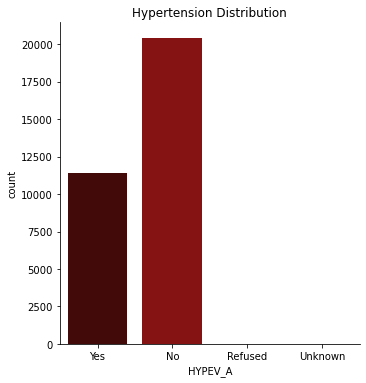

In [160]:
sns.catplot(x='HYPEV_A', kind='count', palette='gist_heat', data=df); # gist_heat, ch:.25, magma
plt.title('Hypertension Distribution');
plt.xticks(ticks=(0,1,2,3), labels=('Yes', 'No', 'Refused', 'Unknown'));

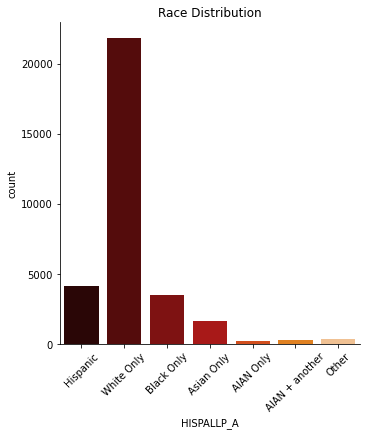

In [61]:
sns.catplot(x='HISPALLP_A', kind='count', palette='gist_heat', data=df); # gist_heat, ch:.25, magma
plt.title('Race Distribution');
plt.xticks(ticks=(0,1,2,3,4,5,6), rotation=45, 
           labels=('Hispanic', 'White Only', 'Black Only', 'Asian Only', 'AIAN Only', 'AIAN + another', 'Other'));

In [62]:
df['HISPALLP_A'].value_counts(normalize=True)

2    0.684770
1    0.129911
3    0.108745
4    0.051551
7    0.010630
6    0.007745
5    0.006648
Name: HISPALLP_A, dtype: float64

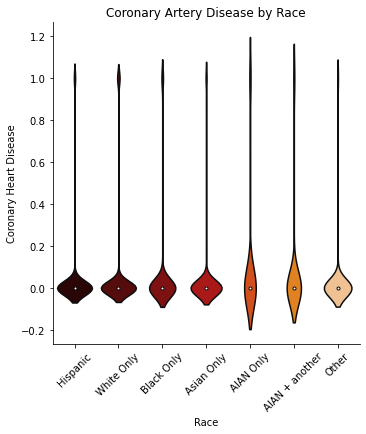

In [68]:
sns.catplot(x='HISPALLP_A', y='CHDEV_A', kind='violin', data=df, split=True, palette='gist_heat');
plt.title('Coronary Artery Disease by Race');
plt.xticks(ticks=(0,1,2,3,4,5,6), labels=('Hispanic', 'White Only', 'Black Only', 'Asian Only', 'AIAN Only', 'AIAN + another', 'Other'), rotation=45);
plt.ylabel('Coronary Heart Disease');
plt.xlabel('Race');

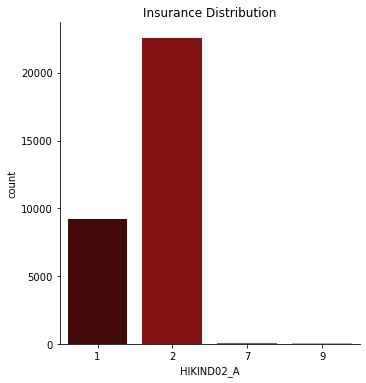

In [188]:
sns.catplot(x='HIKIND02_A', kind='count', palette='gist_heat', data=df); # gist_heat, ch:.25, magma
plt.title('Insurance Distribution');
# plt.xticks(ticks=(0,1,2,3,4,5,6), rotation=45, 
#            labels=('Hispanic', 'White Only', 'Black Only', 'Asian Only', 'AIAN Only', 'AIAN + another', 'Other'));

In [7]:
df.drop(df[df['SEX_A']==7].index, inplace=True)

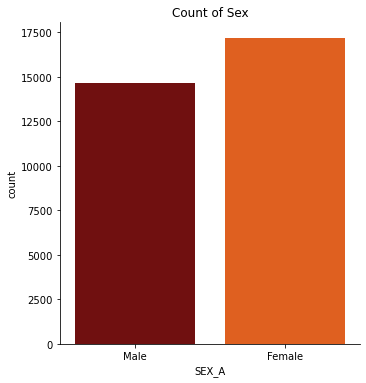

In [149]:
sns.catplot(x='SEX_A', kind='count', palette='gist_heat', data=df);
plt.title('Count of Sex');
plt.xticks(ticks=(0,1), labels=('Male', 'Female'));

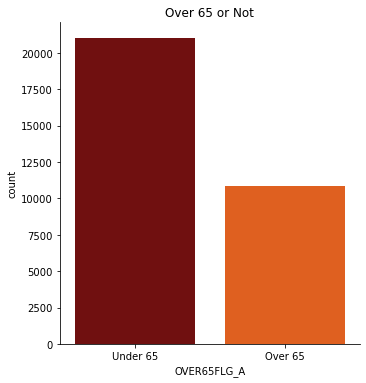

In [105]:
sns.catplot(x='OVER65FLG_A', kind='count', palette='gist_heat', data=df);
plt.title('Respondents Over 65 or Younger');
plt.xticks(ticks=(0,1), labels=('Under 65', 'Over 65'));

In [8]:
# changing values in target column to don't know(9) if not yes(1) or no(2) and changing no to 0
df['CHDEV_A'] = df['CHDEV_A'].replace([2,7,8], [0,9,9])

In [9]:
target_unknown = df[df['CHDEV_A'] == 9]

In [10]:
# dropping rows that aren't yes or no in order to use SMOTE
df.drop(target_unknown.index, inplace=True)

In [129]:
df['CHDEV_A'].value_counts(normalize=True)

0    0.942115
1    0.057885
Name: CHDEV_A, dtype: float64

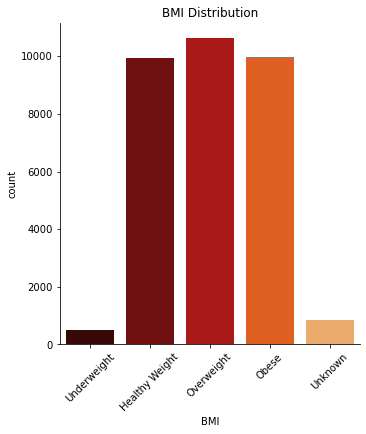

In [168]:
sns.catplot(x='BMICAT_A', kind='count', data=df, palette='gist_heat');
plt.title('BMI Distribution');
plt.xticks(ticks=(0,1,2,3,4), labels=('Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Unknown'), rotation=45);
# plt.ylabel('Coronary Heart Disease');
plt.xlabel('BMI');

In [115]:
smoke = df['SMKCIGST_A'].value_counts(normalize=True)
heart = df['CHDEV_A'].value_counts(normalize=True)

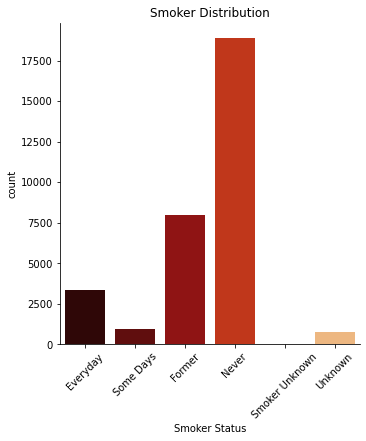

In [163]:
sns.catplot(x='SMKCIGST_A', kind='count', data=df, palette='gist_heat');
plt.title('Smoker Distribution');
plt.xticks(ticks=(0,1,2,3,4,5), labels=('Everyday', 'Some Days', 'Former', 'Never', 'Smoker Unknown', 'Unknown'), rotation=45);
# plt.ylabel('Coronary Heart Disease');
plt.xlabel('Smoker Status');

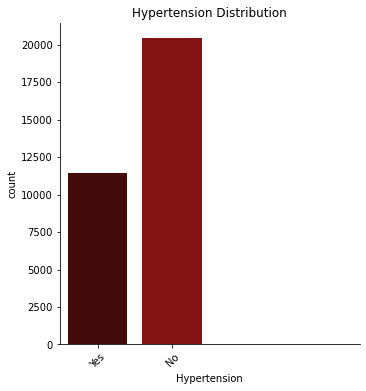

In [172]:
sns.catplot(x='HYPEV_A', kind='count', data=df, palette='gist_heat');
plt.title('Hypertension Distribution');
plt.xticks(ticks=(0,1), labels=('Yes', 'No'), rotation=45);
plt.xlabel('Hypertension');

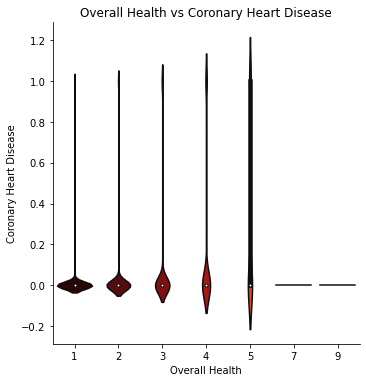

In [103]:
sns.catplot(x='PHSTAT_A', y='CHDEV_A', kind='violin', data=df, split=True, palette='gist_heat');
plt.title('Overall Health vs Coronary Heart Disease');
# plt.xticks(ticks=(0,1,2,3,4,5,6), labels=('Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'Refused', 'Unknown'), rotation=45);
plt.ylabel('Coronary Heart Disease');
plt.xlabel('Overall Health');

In [181]:
df.groupby('BMICAT_A')['CHDEV_A'].mean()

BMICAT_A
1    0.036965
2    0.045021
3    0.059322
4    0.071235
9    0.046484
Name: CHDEV_A, dtype: float64

In [183]:
df.groupby('CHLEV_A')['CHDEV_A'].value_counts(normalize=True)

CHLEV_A  CHDEV_A
1        0          0.861287
         1          0.138713
2        0          0.974727
         1          0.025273
7        0          1.000000
9        0          0.925000
         1          0.075000
Name: CHDEV_A, dtype: float64

In [184]:
df.groupby('DIBEV_A')['CHDEV_A'].value_counts(normalize=True)

DIBEV_A  CHDEV_A
1        0          0.819028
         1          0.180972
2        0          0.956488
         1          0.043512
7        0          1.000000
9        0          0.909091
         1          0.090909
Name: CHDEV_A, dtype: float64

In [185]:
df.groupby('HYPEV_A')['CHDEV_A'].value_counts(normalize=True)

HYPEV_A  CHDEV_A
1        0          0.873655
         1          0.126345
2        0          0.980375
         1          0.019625
7        0          1.000000
9        0          0.952381
         1          0.047619
Name: CHDEV_A, dtype: float64

In [186]:
df.groupby('SMKCIGST_A')['CHDEV_A'].value_counts(normalize=True)

SMKCIGST_A  CHDEV_A
1           0          0.943436
            1          0.056564
2           0          0.961123
            1          0.038877
3           0          0.897042
            1          0.102958
4           0          0.959858
            1          0.040142
5           0          0.714286
            1          0.285714
9           0          0.945525
            1          0.054475
Name: CHDEV_A, dtype: float64

In [189]:
df.groupby('REGION')['CHDEV_A'].value_counts(normalize=True)

REGION  CHDEV_A
1       0          0.937813
        1          0.062187
2       0          0.944115
        1          0.055885
3       0          0.935173
        1          0.064827
4       0          0.953641
        1          0.046359
Name: CHDEV_A, dtype: float64

In [31]:
new_df = df[['HHX', 'URBRRL', 'REGION', 'INTV_QRT', 'SEX_A', 'EDUC_A', 'AFNOW', 'HISP_A', 'HISPALLP_A', 'RACEALLP_A', 'PCNTTC', 'PCNT18UPTC',
    'PCNTLT18TC', 'OVER65FLG_A', 'MAXEDUC_A', 'PHSTAT_A', 'HYPEV_A', 'CHLEV_A', 'CHDEV_A', 'ANGEV_A', 'MIEV_A', 'STREV_A', 'ASEV_A', 
    'CANEV_A','NUMCAN_A', 'DEMENEV_A', 'ANXEV_A', 'DEPEV_A', 'ANXFREQ_A', 'DEPFREQ_A', 'PREDIB_A', 'DIBEV_A', 'COPDEV_A', 'BMICAT_A', 
    'DIFF_A','EQUIP_A', 'COGMEMDFF_A', 'MEDICARE_A', 'MEDICAID_A', 'PRIVATE_A', 'NOTCOV_A', 'PAYBLL12M_A', 'PAYWORRY_A', 'LASTDR_A', 
    'URGNT12MTC_A',  'EMERG12MTC_A', 'HOSPONGT_A', 'RX12M_A', 'SHTFLU12M_A', 'PAIFRQ3M_A', 'SMKCIGST_A', 'LEGMSTAT_A', 'PARSTAT_A', 
    'AFVET_A', 'CITZNSTP_A', 'EMPWRKLSWK_A']].copy()

In [34]:
new_df

,HHX,URBRRL,REGION,INTV_QRT,SEX_A,EDUC_A,AFNOW,HISP_A,HISPALLP_A,RACEALLP_A,...,HOSPONGT_A,RX12M_A,SHTFLU12M_A,PAIFRQ3M_A,SMKCIGST_A,LEGMSTAT_A,PARSTAT_A,AFVET_A,CITZNSTP_A,EMPWRKLSWK_A
0,H048109,4,3,1,1,7,2.0,2,3,2,...,2,1,2,2.0,4,3,1,1,1,2
1,H027044,4,3,1,2,6,1.0,2,2,1,...,2,2,2,1.0,2,3,3,2,1,1
2,H058855,4,3,1,1,5,NaN,2,2,1,...,2,1,1,2.0,4,3,3,1,1,2
3,H031993,4,3,1,1,7,2.0,1,1,8,...,2,1,2,2.0,4,3,3,1,1,1
4,H007122,1,3,1,1,5,2.0,2,2,1,...,2,1,1,3.0,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31992,H046022,4,4,4,2,7,NaN,2,2,1,...,2,1,1,2.0,3,3,3,2,1,2
31993,H046232,4,4,4,1,5,2.0,2,2,1,...,2,1,2,1.0,4,3,1,2,1,1
31994,H043765,4,4,4,1,5,NaN,2,2,1,...,2,1,2,1.0,4,2,3,2,1,1
31995,H017695,4,4,4,2,7,2.0,1,1,1,...,2,1,2,1.0,4,3,3,2,1,1


In [23]:
new_df['AFNOW'].value_counts(dropna=False)

2.0    23991
NaN     7654
1.0      243
7.0        2
9.0        1
Name: AFNOW, dtype: int64

In [35]:
# filling nulls
new_df['AFNOW'].fillna(8, inplace=True) # 8=not ascertained
new_df['MAXEDUC_A'].fillna(99, inplace=True) # 99=don't know
new_df['PAIFRQ3M_A'].fillna(9, inplace=True) # 9=don't know

In [41]:
# changing datatypes for all columns except the target to objects so they can be dummified since they are categorical values
new_df = new_df.astype(object)
new_df['CHDEV_A'] = new_df['CHDEV_A'].astype(int)

In [38]:
new_df['CHDEV_A'].value_counts(normalize=True)

0    0.942115
1    0.057885
Name: CHDEV_A, dtype: float64

In [44]:
new_df.to_csv('./adult19_clean.csv', index=False)

In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31891 entries, 0 to 31996
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HHX           31891 non-null  object
 1   URBRRL        31891 non-null  object
 2   REGION        31891 non-null  object
 3   INTV_QRT      31891 non-null  object
 4   SEX_A         31891 non-null  object
 5   EDUC_A        31891 non-null  object
 6   AFNOW         31891 non-null  object
 7   HISP_A        31891 non-null  object
 8   HISPALLP_A    31891 non-null  object
 9   RACEALLP_A    31891 non-null  object
 10  PCNTTC        31891 non-null  object
 11  PCNT18UPTC    31891 non-null  object
 12  PCNTLT18TC    31891 non-null  object
 13  OVER65FLG_A   31891 non-null  object
 14  MAXEDUC_A     31891 non-null  object
 15  PHSTAT_A      31891 non-null  object
 16  HYPEV_A       31891 non-null  object
 17  CHLEV_A       31891 non-null  object
 18  CHDEV_A       31891 non-null  int64 
 19  ANGE

### Modeling

In [15]:
# setting X and y variables
X = df.drop(columns=['CHDEV_A', 'HHX'])
y = df['CHDEV_A']

In [16]:
# shape of X
X.shape

(31894, 241)

In [50]:
# dummifying X variables
X_dum = pd.get_dummies(X, drop_first=True)

In [18]:
# shape of X after dummies
X_dum.shape

(31894, 54903)

In [20]:
# imbalanced classes for target variable
y.value_counts(normalize=False)

0    30048
1     1846
Name: CHDEV_A, dtype: int64

In [49]:
# splitting data into train and test sets for X and y variables
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, stratify=y, random_state=19)

In [1]:
sm = SMOTEN(random_state=19)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
X_train_res.shape, y_train_res.shape

In [ ]:
y_train_res['CHDEV_A'].value_counts(normalize=True)

In [ ]:
y_test['CHDEV_A'].value_counts(normalize=True)

In [289]:
lrbase = LogisticRegression(max_iter=10_000)
lrbase.fit(X_train_res, y_train_res.ravel())

LogisticRegression(max_iter=10000)

In [290]:
lrbase_preds = lrbase.predict(X_test)

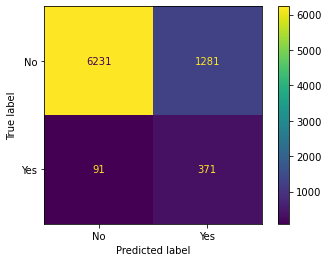

In [291]:
lrbase_cm = confusion_matrix(y_test, lrbase_preds) # kitchen sink model w/dummies and SMOTE
ConfusionMatrixDisplay(lrbase_cm, display_labels=['No', 'Yes']).plot();

In [292]:
print(classification_report(y_test, lrbase_preds))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7512
           1       0.22      0.80      0.35       462

    accuracy                           0.83      7974
   macro avg       0.61      0.82      0.63      7974
weighted avg       0.94      0.83      0.87      7974



In [293]:
coefbase_df = pd.DataFrame({'coefs': lrbase.coef_[0], 'features': X_dum.columns[i]})
# coefbase_df['feature_names'] = [X_dum.columns[i] for i in coefbase_df['features']]
coefbase_df.nlargest(10)

,coefs,features,feature_names
3,1.024096,5840,OVER65FLG_A_1
1,0.629671,4187,EMPWRKLSWK_A_2
0,0.327068,4066,AFNOW_2.0
5,0.284837,6550,HIKIND02_A_2
4,-0.206624,5987,INCSSRR_A_2.0
2,-0.424801,5799,MEDICARE_A_3
8,-0.758792,6673,CHLEV_A_2
9,-0.992718,6676,HYPEV_A_2
7,-2.660184,6671,ANGEV_A_2
6,-3.143887,6669,MIEV_A_2


In [226]:
kb = SelectKBest(k=10)
X_kb = kb.fit_transform(X_dum, y)

In [227]:
X_kb.shape

(31894, 10)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_kb, y, stratify=y, random_state=19)

In [229]:
nm = NearMiss()
X_train_miss, y_train_miss = nm.fit_resample(X_train, y_train.ravel())

In [230]:
X_train_miss.shape, y_train_miss.shape

((2768, 10), (2768,))

In [131]:
lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train_miss, y_train_miss.ravel())

LogisticRegression(max_iter=10000)

In [132]:
lr_preds = lr.predict(X_test)

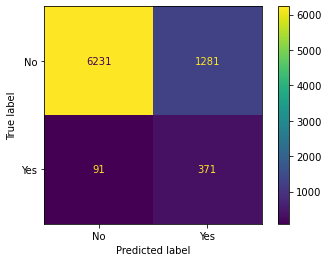

In [150]:
lr_cm = confusion_matrix(y_test, lr_preds) # kbest = 10, near miss, lr C=1.0
ConfusionMatrixDisplay(lr_cm, display_labels=['No', 'Yes']).plot();

In [134]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7512
           1       0.22      0.80      0.35       462

    accuracy                           0.83      7974
   macro avg       0.61      0.82      0.63      7974
weighted avg       0.94      0.83      0.87      7974



The SMOTEN model is not predicting well for people who have been told they have coronary artery disease. It's misclassifying most of them so, we need to go back and change some things. 

In [72]:
lr.coef_[0]

array([ 0.16244913, -0.52497223,  0.47884663,  1.13467059, -1.10728718,
       -0.29138259,  3.13500938,  3.16624461,  0.98412844,  0.71186651])

In [74]:
kb.get_support(indices=True)

array([4068, 4118, 4548, 5804, 5846, 6557, 6676, 6678, 6680, 6683])

In [135]:
coef_df = pd.DataFrame({'coefs': lr.coef_[0], 'features': kb.get_support(indices=True)})
coef_df

,coefs,features
0,0.327068,4066
1,0.629671,4187
2,-0.424801,5799
3,1.024096,5840
4,-0.206624,5987
5,0.284837,6550
6,-3.143887,6669
7,-2.660184,6671
8,-0.758792,6673
9,-0.992718,6676


In [81]:
X_dum.columns[4068]

'AFNOW_9.0'

In [136]:
coef_df['feature_names'] = [X_dum.columns[i] for i in coef_df['features']]

In [139]:
coef_df.sort_values('coefs', ascending=False)

,coefs,features,feature_names
3,1.024096,5840,OVER65FLG_A_1
1,0.629671,4187,EMPWRKLSWK_A_2
0,0.327068,4066,AFNOW_2.0
5,0.284837,6550,HIKIND02_A_2
4,-0.206624,5987,INCSSRR_A_2.0
2,-0.424801,5799,MEDICARE_A_3
8,-0.758792,6673,CHLEV_A_2
9,-0.992718,6676,HYPEV_A_2
7,-2.660184,6671,ANGEV_A_2
6,-3.143887,6669,MIEV_A_2


In [158]:
# modeling with unbalanced classes
lr_base = LogisticRegression(max_iter=10_000)
lr_base.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [159]:
lr_base_preds = lr_base.predict(X_test)

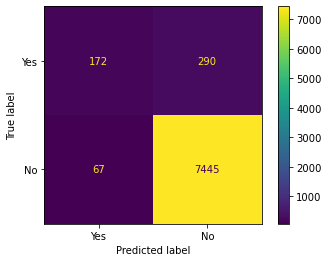

In [160]:
lrb_cm = confusion_matrix(y_test, lr_base_preds)
ConfusionMatrixDisplay(lrb_cm, display_labels=['Yes', 'No']).plot();

In [161]:
print(classification_report(y_test, lr_base_preds))

              precision    recall  f1-score   support

           1       0.72      0.37      0.49       462
           2       0.96      0.99      0.98      7512

    accuracy                           0.96      7974
   macro avg       0.84      0.68      0.73      7974
weighted avg       0.95      0.96      0.95      7974



In [52]:
# constant_columns = [column for column in df.drop(columns=['CHDEV_A', 'HHX']).columns
                    if column not in df.drop(columns=['CHDEV_A', 'HHX']).columns[var_th.get_support()]]

In [56]:
# constant_columns

['INCTCFLG_A',
 'DISAB3_A',
 'AFNOW',
 'SASPPRACE_A',
 'SASPPHISP_A',
 'HHRESPSA_FLG',
 'EXCHANGE_A',
 'OGFLG_A',
 'OPFLG_A',
 'CHFLG_A',
 'MAFLG_A',
 'PRFLG_A',
 'OTHGOV_A',
 'OTHPUB_A',
 'IHS_A',
 'CHIP_A',
 'PRPLCOV1_C_A',
 'PRPLCOV2_C_A',
 'MLTFAMFLG_A',
 'HISP_A',
 'SRVY_YR',
 'SPOUSLIV_A',
 'PIPECUR_A',
 'CIGARCUR_A',
 'PAIYOGA_A',
 'PAIGROUP_A',
 'PAIPROGRAM_A',
 'PAITALKTPY_A',
 'PAICHIRO_A',
 'MHRX_A',
 'WRKHLTHFC_A',
 'RXDL12M_A',
 'RXLS12M_A',
 'RXSK12M_A',
 'HINOTYR_A',
 'HISTOPAGE_A',
 'CHHDHP_A',
 'CHDEDUC_A',
 'HIKIND09_A',
 'HIKIND08_A',
 'HIKIND07_A',
 'HIKIND05_A',
 'HICOV_A',
 'UPPSLFCR_A',
 'COMDIFF_A',
 'CANEWLKR_A',
 'EQUIP_A',
 'HEARAID_A',
 'PREGNOW_A',
 'DEMENEV_A',
 'COPDEV_A',
 'DIBEV_A',
 'GESDIB_A',
 'CANEV_A',
 'ASER12M_A',
 'ASPONOWN_A',
 'STREV_A',
 'MIEV_A',
 'ANGEV_A',
 'PROXY_A',
 'HHSTAT_A',
 'RECTYPE']